In [12]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv('data/descriptor/all_descriptors.csv')
data_positive = pd.read_csv('data/descriptor/positive_descriptors.csv')
data_negative = pd.read_csv('data/descriptor/negative_descriptors.csv')

feature_names = pd.read_csv('feature_names.csv')['Value']

# Set feature names as column names of data dataset
data.columns = feature_names
data_positive.columns = feature_names
data_negative.columns = feature_names
print('Shape of positive:', data_positive.shape)
print('Shape of negative:', data_negative.shape)
print('Shape of all:', data.shape)


Shape of positive: (945, 583)
Shape of negative: (931, 583)
Shape of all: (1876, 583)


In [21]:
zero_percentage_all = (data == 0).mean() * 100
zero_percentage_positive = (data_positive == 0).mean() * 100
zero_percentage_negative = (data_negative == 0).mean() * 100


zero_perc_check_df = pd.DataFrame({
    'Zero_Percentage_all': zero_percentage_all,
    'Zero_Percentage_positive': zero_percentage_positive,
    'Zero_Percentage_negative': zero_percentage_negative
})
zero_perc_check_df.reset_index(inplace=True)
zero_perc_check_df.rename(columns={'index': 'Value'}, inplace=True)
zero_perc_check_df

,Value,Zero_Percentage_all,Zero_Percentage_positive,Zero_Percentage_negative
0,AUTOCORR2D_1,0.000000,0.000000,0.000000
1,AUTOCORR2D_2,0.000000,0.000000,0.000000
2,AUTOCORR2D_3,0.000000,0.000000,0.000000
3,AUTOCORR2D_4,0.000000,0.000000,0.000000
4,AUTOCORR2D_5,0.053305,0.000000,0.107411
...,...,...,...,...
578,fr_thiazole,98.773987,99.682540,97.851772
579,fr_thiocyan,100.000000,100.000000,100.000000
580,fr_thiophene,94.402985,98.518519,90.225564
581,fr_unbrch_alkane,63.272921,39.047619,87.862513


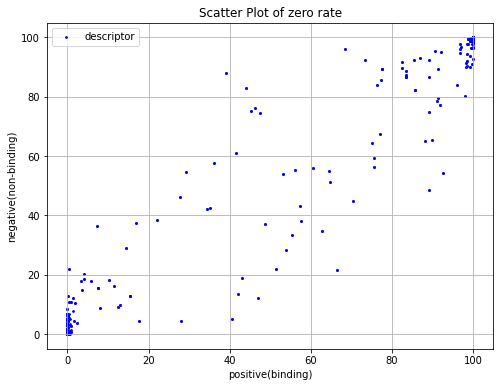

In [34]:
x = zero_perc_check_df['Zero_Percentage_positive']
y = zero_perc_check_df['Zero_Percentage_negative']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s = 3,c='blue', marker='o', label='descriptor')
plt.xlabel('positive(binding)')
plt.ylabel('negative(non-binding)')
plt.title('Scatter Plot of zero rate')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
res = zero_perc_check_df[(zero_perc_check_df['Zero_Percentage_positive'] > 0.8) & (zero_perc_check_df['Zero_Percentage_negative'] > 0.8)]['Value']
print(len(res), res)


285 193         MinEStateIndex
195      MinAbsEStateIndex
201    NumRadicalElectrons
237              PEOE_VSA1
238             PEOE_VSA10
              ...         
578            fr_thiazole
579            fr_thiocyan
580           fr_thiophene
581       fr_unbrch_alkane
582                fr_urea
Name: Value, Length: 285, dtype: object


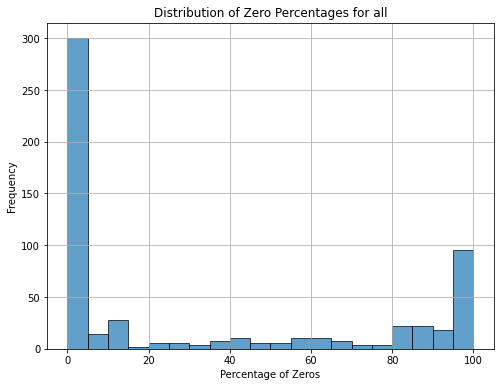

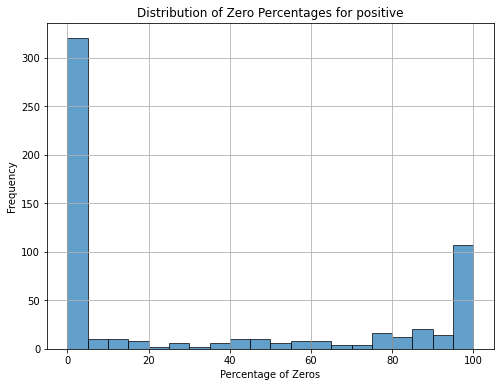

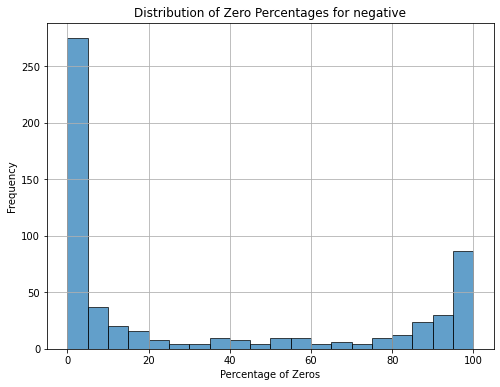

In [58]:
def zero_perc_distribution(zero_percentage, group):
    plt.figure(figsize=(8, 6))
    plt.hist(zero_percentage, bins=20, edgecolor='k', alpha=0.7)
    plt.xlabel('Percentage of Zeros')
    plt.ylabel('Frequency')
    plt.title('Distribution of Zero Percentages for {}'.format(group))
    plt.grid(True)
    plt.show()
    plt.close()

zero_perc_distribution(zero_percentage_all, 'all')
zero_perc_distribution(zero_percentage_positive, 'positive')
zero_perc_distribution(zero_percentage_negative, 'negative')

<AxesSubplot:>

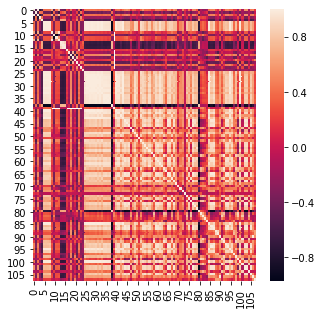

In [89]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.datasets import make_blobs   
# data, _ = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)
data = pd.read_csv('data/descriptor/all_descriptors_cut.csv')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
# data_scaled = data

corr = data_scaled.corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr)


<AxesSubplot:>

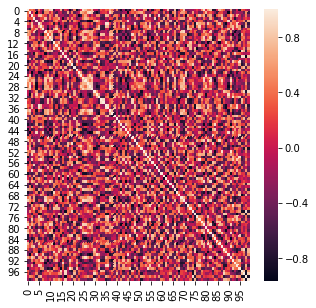

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs   
data, _ = make_blobs(n_samples=2000, centers=5, n_features=100)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

data_scaled = pd.DataFrame(data_scaled)
# data_scaled = data

corr = data_scaled.corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr)


In [112]:
from minisom import MiniSom

# Create and train a MiniSom model
som = MiniSom(5, 5, input_len = 25)  # Example SOM with a 5x5 grid
data = np.random.rand(100, 25)
som.train(data, 100)  # Training the SOM with your data



In [113]:
som.get_weights()[0,0]


array([ 0.0942284 ,  0.31329971,  0.05216342, -0.14543429,  0.0588734 ,
        0.14168889, -0.17604905, -0.19634159,  0.15517759,  0.31307329,
        0.1555575 , -0.05345576, -0.07700072,  0.07865421,  0.08026165,
       -0.11976502,  0.32162843,  0.03091144, -0.25442294,  0.15254706,
        0.33786564,  0.20306527,  0.3085181 , -0.05275898, -0.26049992])

In [114]:
def calculate_response(neuron_weight, data_point):
    # Calculate Euclidean distance between the neuron weight and data point
    distance = np.linalg.norm(neuron_weight - data_point)
    return -distance  # Negative distance can be used as a measure of similarity

def plot_activation_map_as_heatmap(som, data_point, img_label):
    # Initialize the activation map
    grid_shape = som.get_weights().shape[:2]
    som_neurons_weights = som.get_weights() #.reshape(-1, som.get_weights().shape[2])
    activation_map = np.zeros((grid_shape[0], grid_shape[1]))

    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            # Calculate the response of neuron (i, j) to the data point
            neuron_weight = som_neurons_weights[i, j]
            response = calculate_response(neuron_weight, data_point)

            # Assign the response to the activation map
            activation_map[i, j] = response

    # Create a heatmap of the activation map
    plt.figure(figsize=(8, 8))
    plt.imshow(activation_map, cmap='viridis', interpolation='nearest', aspect='auto')
    plt.colorbar()  # Add a colorbar to show the scale
    plt.title('Activation Map (Heatmap) for Data Point')
    plt.xlabel('SOM Neuron X-coordinate')
    plt.ylabel('SOM Neuron Y-coordinate')
    # Save the heatmap as an image
    plt.savefig("heatmap-{}".format(img_label), bbox_inches='tight')
    plt.close()  # Close the plot to free up resources

    print("Image saved successfully.")


In [115]:
plot_activation_map_as_heatmap(som, data[1], img_label = 1)

Image saved successfully.


In [157]:
import os
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import time

# def _data(samples=300, centers=3, features=3, random_state=42):
#     data, _ = make_blobs(n_samples=samples, centers=centers, n_features=features, random_state=random_state)
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(data)

def train_som(data, x_size=10, y_size=10, sigma=1.0, lr=0.5, iterations=1000):
    start_time = time.time()
    
    som = MiniSom(x_size, y_size, data.shape[1], sigma=sigma, learning_rate=lr)
    som.random_weights_init(data)
    som.train(data, iterations)
    
    end_time = time.time()
    print(f"SOM training completed in {end_time - start_time:.2f} seconds.")
    return som

def calculate_response(neuron_weight, data_point):
    # Calculate Euclidean distance between the neuron weight and data point    
    mask = ~np.isnan(neuron_weight) & ~np.isnan(data_point)
    
    # Calculate the Euclidean distance for non-NaN values
    distance = np.linalg.norm(neuron_weight[mask] - data_point[mask])
    return distance  # Negative distance can be used as a measure of similarity

def plot_activation_map_as_heatmap(som, data_point, img_label):
    # Initialize the activation map
    grid_shape = som.get_weights().shape[:2]
#     print('grid_hape',grid_shape)
    som_neurons_weights = som.get_weights() #.reshape(-1, som.get_weights().shape[2])
#     print('som_neurons_weights', som_neurons_weights)
    activation_map = np.zeros((grid_shape[0], grid_shape[1]))
#     print('data point', data_point)
    
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            # Calculate the response of neuron (i, j) to the data point
            neuron_weight = som_neurons_weights[i, j]
            response = calculate_response(neuron_weight, data_point)
            # Assign the response to the activation map
            activation_map[i, j] = response
    
    print(pd.DataFrame(activation_map))
    # Create a heatmap of the activation map
    plt.figure(figsize=(8, 8))
    plt.imshow(activation_map, cmap='viridis', interpolation='nearest', aspect='auto')
    plt.colorbar()  # Add a colorbar to show the scale
    plt.title('Activation Map (Heatmap) for Data Point')
    plt.xlabel('SOM Neuron X-coordinate')
    plt.ylabel('SOM Neuron Y-coordinate')
    # Save the heatmap as an image
    plt.savefig("heatmap-{}".format(img_label), bbox_inches='tight')
    plt.close()  # Close the plot to free up resources

    print("Image saved successfully.")

# Usage
data = pd.read_csv('data/descriptor/all_descriptors.csv')
if not isinstance(data, np.ndarray):
    data = data.values

# from sklearn.datasets import make_blobs   
# data, _ = make_blobs(n_samples=2000, centers=5, n_features=400)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# data_scaled = data

som = train_som(data_scaled, x_size=28, y_size=28, sigma=0.5, lr=0.05, iterations=2000)
for i in range(3):
    
    plot_activation_map_as_heatmap(som, data_scaled[i], img_label = i)


SOM training completed in 7.81 seconds.
          0         1         2         3         4         5         6   \
0   1.743926  1.913435  3.624156  1.812849  2.123054  2.272459  2.398925   
1   2.108617  2.512777  2.450698  5.723131  2.313939  2.242790  1.945469   
2   2.171909  2.755471  3.539859  1.629825  3.329303  2.355503  2.638915   
3   2.530429  2.443272  2.611326  2.751832  2.702538  2.634724  3.307689   
4   2.139511  2.460113  2.685295  2.616453  5.723131  2.536730  2.405149   
5   2.021981  2.621629  2.968148  2.685762  2.415811  2.546444  4.287474   
6   2.094571  2.402148  2.752875  2.974933  1.363224  2.922792  2.594583   
7   2.377615  2.983114  5.399423  3.046418  2.457411  2.741265  3.973976   
8   2.239146  5.716560  2.025803  2.668960  2.924483  2.896974  5.932891   
9   2.511106  3.370414  2.817324  2.389250  2.017895  2.858003  2.604679   
10  2.158602  2.398847  3.377322  2.448511  2.571210  2.699061  3.238460   
11  2.554270  2.382262  2.761180  2.471000  2.53

Image saved successfully.
          0         1         2         3         4         5         6   \
0   2.281801  2.187436  3.644287  2.310076  2.815687  2.857468  3.044243   
1   2.455052  2.993437  2.949642  6.085825  1.843810  3.080062  0.623801   
2   2.240523  3.250344  4.059254  2.292730  3.526437  2.826161  2.575098   
3   3.215964  2.755358  2.585499  3.303502  3.184167  2.558238  3.635493   
4   2.181121  2.765984  3.359709  3.325844  6.085825  2.558605  2.905302   
5   2.626026  3.294168  3.441467  3.276385  2.853039  3.222810  4.816818   
6   2.848541  2.499722  3.094220  3.371734  2.162407  3.194020  3.145018   
7   2.508503  3.589568  5.822463  3.422448  2.378062  3.226051  4.042167   
8   2.894189  6.187699  2.612353  2.689028  3.521525  3.548022  6.385682   
9   2.659026  3.998119  2.807352  2.353449  2.562680  2.788953  2.775792   
10  2.368410  2.645598  3.860474  2.984458  3.086405  2.656662  3.210334   
11  3.016664  3.024811  3.461595  2.356153  3.215964  2.702775

In [143]:
data_scaled

array([[0.2501489 , 0.24541284, 0.3341629 , ..., 0.        , 0.08333333,
        0.        ],
       [0.24280326, 0.23318043, 0.3138009 , ..., 0.        , 0.10416667,
        0.        ],
       [0.23525908, 0.21999235, 0.29117647, ..., 0.        , 0.125     ,
        0.        ],
       ...,
       [0.14234663, 0.16246177, 0.19479638, ..., 0.        , 0.        ,
        0.        ],
       [0.14234663, 0.16246177, 0.19479638, ..., 0.        , 0.        ,
        0.        ],
       [0.36728211, 0.37308869, 0.4760181 , ..., 0.        , 0.        ,
        0.        ]])

In [144]:
import numpy as np



# Check for NaN values
has_nan = np.isnan(data_scaled).any()

if has_nan:
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain NaN values.")


The dataset contains NaN values.


In [145]:
import numpy as np
import pandas as pd

data = pd.DataFrame(data)
# Find rows with more than 0 NaNs
rows_with_nans = data[data.isna().sum(axis=1) > 0]

# Find columns with more than 0 NaNs
columns_with_nans = data.columns[data.isna().sum() > 0]

# Report rows with more than 0 NaNs
print("Rows with more than 0 NaNs:")
print(rows_with_nans)

# Report columns with more than 0 NaNs
print("\nColumns with more than 0 NaNs:")
print(columns_with_nans)

Rows with more than 0 NaNs:
        0      1      2      3      4      5      6      7      8      9    \
79    5.846  6.242  4.974  4.890  4.891  4.896  4.926  4.951  4.904  5.236   
227   6.555  6.952  5.958  5.850  5.835  5.846  5.892  5.930  5.714  6.054   
228   6.913  7.311  6.307  6.206  6.197  6.209  6.260  6.302  6.065  6.407   
229   5.981  6.379  5.417  5.294  5.260  5.261  5.324  5.358  5.146  5.484   
230   7.291  7.687  6.446  6.387  6.417  6.439  6.458  6.498  6.365  6.704   
231   6.442  6.837  5.583  5.513  5.533  5.550  5.565  5.598  5.513  5.849   
232   6.808  7.205  5.960  5.897  5.920  5.938  5.963  6.002  5.877  6.216   
233   7.388  7.786  6.771  6.675  6.672  6.688  6.733  6.776  6.539  6.882   
1096  3.727  3.901  3.826  3.889  4.029  4.082  3.939  3.754  3.371  3.569   
1493  4.264  4.591  4.665  4.824  4.659  4.731  4.848  4.908  3.747  4.114   
1494  4.264  4.591  4.665  4.824  4.659  4.731  4.848  4.908  3.747  4.114   
1517  3.362  3.780  3.873  3.876  3.

In [153]:
import pandas as pd

# Assuming you have a DataFrame, replace this with your actual data
data = pd.read_csv('data/descriptor/all_descriptors.csv')
# if not isinstance(data, np.ndarray):
#     data = data.values

# from sklearn.datasets import make_blobs   
# data, _ = make_blobs(n_samples=2000, centers=5, n_features=400)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)

# Find the location of the maximum value
max_location = data_scaled.stack().idxmax()

# Print the location
print("Location of Maximum Value:", max_location)


Location of Maximum Value: (230, 50)


In [154]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,573,574,575,576,577,578,579,580,581,582
0,0.250149,0.245413,0.334163,0.371435,0.529976,0.527661,0.529036,0.521842,0.293111,0.285016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0
1,0.242803,0.233180,0.313801,0.348740,0.517836,0.514504,0.507946,0.503542,0.288026,0.277679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104167,0.0
2,0.235259,0.219992,0.291176,0.323340,0.504646,0.500000,0.493242,0.482733,0.282709,0.270342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0
3,0.177487,0.174312,0.232579,0.253800,0.465528,0.470993,0.447646,0.402893,0.223301,0.222766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.197141,0.189602,0.252489,0.277535,0.469874,0.475179,0.478241,0.453955,0.233010,0.230325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,0.321223,0.330849,0.448416,0.487820,0.624251,0.595694,0.548492,0.511954,0.355987,0.363273,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1872,0.321223,0.330849,0.448416,0.487820,0.624251,0.595694,0.548492,0.511954,0.355987,0.363273,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1873,0.142347,0.162462,0.194796,0.239225,0.447392,0.454097,0.315758,0.000000,0.127601,0.154958,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1874,0.142347,0.162462,0.194796,0.239225,0.447392,0.454097,0.315758,0.000000,0.127601,0.154958,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


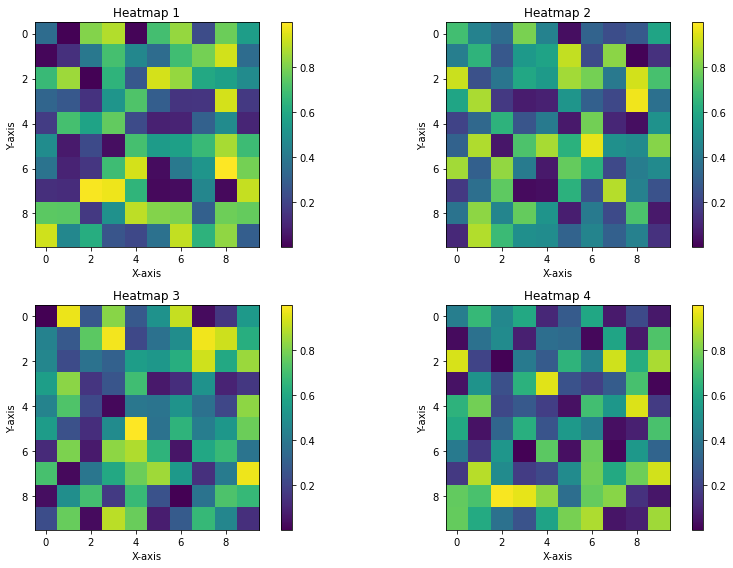

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data for heatmaps (replace with your actual data)
num_subplots = 4  # For example, you have 4 heatmaps
data = [np.random.rand(10, 10) for _ in range(num_subplots)]

# Determine the number of rows and columns based on the number of subplots
num_rows, num_cols = int(np.sqrt(num_subplots)), int(np.ceil(np.sqrt(num_subplots)))

# Calculate the minimum and maximum values across all datasets
global_min = min(data_array.min() for data_array in data)
global_max = max(data_array.max() for data_array in data)

# Create subplots for the heatmaps
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Plot each heatmap
for i, ax in enumerate(axs.ravel()):
    if i < num_subplots:
        im = ax.imshow(data[i], cmap='viridis', vmin=global_min, vmax=global_max)
        ax.set_title(f'Heatmap {i + 1}')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        fig.colorbar(im, ax=ax, orientation='vertical')

# Adjust layout and save each subplot individually
plt.tight_layout()
for i, ax in enumerate(axs.ravel()):
    if i < num_subplots:
        plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
        plt.imshow(ax.images[0].get_array(), cmap='viridis', vmin=global_min, vmax=global_max)
        plt.colorbar()
        plt.title(ax.get_title())
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.savefig(f'subplot_{i + 1}.png', dpi=300, bbox_inches='tight')
        plt.close()

# Display the entire figure
plt.show()


In [1]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

# Create a molecule from a SMILES string
smiles = "CCO"  # Replace with your SMILES string
mol = Chem.MolFromSmiles(smiles)

# Calculate the MACCS fingerprint
maccs_fp = MACCSkeys.GenMACCSKeys(mol)

# Convert the MACCS fingerprint to a binary vector
maccs_binary = maccs_fp.ToBitString()

# Print the binary vector
print("MACCS Binary Fingerprint:")
print(maccs_binary)


MACCS Binary Fingerprint:
00000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000001000010000000000000000000000001000000000000010101001000100


In [3]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

# Create a molecule from a SMILES string
smiles = "C=O"  # Replace with your SMILES string
mol = Chem.MolFromSmiles(smiles)

# Calculate the MACCS fingerprint
maccs_fp = MACCSkeys.GenMACCSKeys(mol)

# Convert the MACCS fingerprint to a binary vector
maccs_binary = maccs_fp.ToBitString()

# Print the binary vector
print("MACCS Binary Fingerprint:")
print(maccs_binary)


MACCS Binary Fingerprint:
00000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000100


In [4]:
maccs_fp

--------------

In [74]:
from chembl_webresource_client.new_client import new_client
import pandas as pd

def filter_activities(target_id, standard_types, max_standard_value):

    try:
        # Filter activities based on the specified criteria
        activities = new_client.activity.filter(
            target_chembl_id=target_id,
            standard_type__in=standard_types,
            standard_value__lt=max_standard_value,
            standard_units="nM"  # Filter by unit (nanomolar)
        ).only(
            "molecule_chembl_id",
#             "standard_type",
#             "standard_relation",
#             "standard_units",
#             "standard_value",
            "molecule_structures"
        )

        return activities

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

# Define the target ChEMBL ID, standard types, and maximum standard value
target_id = "CHEMBL2107"  #CXCR4 Homo sapiens
standard_types = ["EC50", "IC50", "Ki"]
max_standard_value = 10000  # Maximum standard value in 10 microM

# Call the function to filter activities
filtered_activities = filter_activities(target_id, standard_types, max_standard_value)

data = pd.DataFrame(filtered_activities)
# # Iterate through the filtered activities and print them
# for activity in filtered_activities:
#     print(activity)
data

,molecule_chembl_id,standard_value,value
0,CHEMBL105570,1000.0,1000.0
1,CHEMBL105659,1000.0,1000.0
2,CHEMBL321539,1000.0,1000.0
3,CHEMBL104474,1000.0,1000.0
4,CHEMBL319622,1000.0,1000.0
...,...,...,...
1205,CHEMBL18442,3.1,3.1
1206,CHEMBL5172755,12.0,12.0
1207,CHEMBL18442,320.0,320.0
1208,CHEMBL5172755,236.4,236.4


In [76]:
data.columns

Index(['molecule_chembl_id', 'standard_value', 'value'], dtype='object')

In [113]:
"""
    This script is for collecting compound information from the CHEMBL database
    and merge the active coumpound from the database with our inhouse compounds database.
    
    The script will output two csv files, one for positive dataset and one for negative dataset.
    The positive dataset contains the active compounds from the CHEMBL database and our inhouse database.
    The negative dataset contains the inactive compounds from the CHEMBL database.
    
    Both datasets contains the following columns:
        - comp_id: compound ID
        - smiles: SMILES string
        - bioactivity: bioactivity value
        - y_label: label for the bioactivity value, positive or negative
"""

from chembl_webresource_client.new_client import new_client
import pandas as pd

def filter_activities( standard_types, max_standard_value,unit):
    """
    Filters activities based on the specified criteria.

    Args:
        target_id (str): The target ChEMBL ID.
        standard_types (list): A list of standard types to filter by.
        max_standard_value (int): The maximum standard value in 10 microM.

    Returns:
        A list of filtered activities.
    """
    try:
        # Filter activities based on the specified criteria
        activities = new_client.activity.filter(
            target_chembl_id='CHEMBL2107',
            standard_type__in=standard_types,
            standard_relation__in=['=', '<'],
            standard_value__lt=max_standard_value,
            standard_units=unit # Filter by unit (nanomolar)
        ).only(
            "molecule_chembl_id",
            "standard_type",
            "standard_relation",
            "standard_units",
            "standard_value",
#             "molecule_structures"
        )

        return activities

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []


def get_smiles_from_id(mol_id):
    try:
        molecule = new_client.molecule.get(mol_id)
        return molecule["molecule_structures"]["canonical_smiles"]

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None
    
############################################################################################################
# Define the target ChEMBL ID, standard types, and maximum standard value
target_id = "CHEMBL2107"  #CXCR4 Homo sapiens
standard_types = ["EC50", "IC50", "Ki"]

filter




# # Call the function to filter activities
# pos_chembl = filter_activities(target_id, standard_types, max_standard_value)
# pos_chembl = pd.DataFrame(pos_chembl)
# pos_chembl

# molecules = new_client.molecule.filter(molecule_chembl_id__in=list(pos_chembl['molecule_chembl_id']))
# chembl_id_to_smiles = {molecule['molecule_chembl_id']: molecule['molecule_structures']['canonical_smiles']
#                        for molecule in molecules
#                        if 'molecule_structures' in molecule and molecule['molecule_structures']}
# smiles_df = pd.DataFrame(list(chembl_id_to_smiles.items()), columns=['molecule_chembl_id', 'smiles'])

# pos_chembl = pos_chembl.merge(smiles_df, on='molecule_chembl_id')
# pos_chembl.head()


,molecule_chembl_id,relation,standard_relation,standard_type,standard_units,standard_value,type,units,value
0,CHEMBL1202230,=,=,IC50,nM,4363.0,IC50,uM,4.363
1,CHEMBL2311089,=,=,IC50,nM,7.0,IC50,uM,0.007
2,CHEMBL543895,=,=,IC50,nM,67.0,IC50,uM,0.067
3,CHEMBL538038,=,=,IC50,nM,5737.0,IC50,uM,5.737
4,CHEMBL1202231,=,=,IC50,nM,1.0,IC50,uM,0.001
...,...,...,...,...,...,...,...,...,...
1159,CHEMBL18442,=,=,IC50,nM,3.1,IC50,nM,3.1
1160,CHEMBL5172755,=,=,IC50,nM,12.0,IC50,nM,12.0
1161,CHEMBL18442,=,=,IC50,nM,320.0,IC50,nM,320.0
1162,CHEMBL5172755,=,=,IC50,nM,236.4,IC50,nM,236.4


In [117]:
data = pos_chembl
data = [['molecule_chembl_id', 'relation','']]

data

,molecule_chembl_id,relation,standard_relation,standard_type,standard_units,standard_value,type,units,value
0,CHEMBL1202230,=,=,IC50,nM,4363.0,IC50,uM,4.363
1,CHEMBL2311089,=,=,IC50,nM,7.0,IC50,uM,0.007
2,CHEMBL543895,=,=,IC50,nM,67.0,IC50,uM,0.067
3,CHEMBL538038,=,=,IC50,nM,5737.0,IC50,uM,5.737
4,CHEMBL1202231,=,=,IC50,nM,1.0,IC50,uM,0.001
...,...,...,...,...,...,...,...,...,...
1159,CHEMBL18442,=,=,IC50,nM,3.1,IC50,nM,3.1
1160,CHEMBL5172755,=,=,IC50,nM,12.0,IC50,nM,12.0
1161,CHEMBL18442,=,=,IC50,nM,320.0,IC50,nM,320.0
1162,CHEMBL5172755,=,=,IC50,nM,236.4,IC50,nM,236.4


In [114]:
for x in pos_chembl.columns:
    print('--->')
    print(pos_chembl[x].value_counts())

--->
CHEMBL18442      71
CHEMBL477121     36
CHEMBL3091687    19
CHEMBL2062277    16
CHEMBL460491     15
                 ..
CHEMBL4165032     1
CHEMBL1089846     1
CHEMBL4167145     1
CHEMBL219135      1
CHEMBL3954720     1
Name: molecule_chembl_id, Length: 844, dtype: int64
--->
=    1158
<       6
Name: relation, dtype: int64
--->
=    1158
<       6
Name: standard_relation, dtype: int64
--->
IC50    977
EC50     96
Ki       91
Name: standard_type, dtype: int64
--->
nM    1164
Name: standard_units, dtype: int64
--->
4.0       13
10.0      12
18.0      12
11.0      11
30.0      10
          ..
131.0      1
690.0      1
278.0      1
1930.0     1
1398.0     1
Name: standard_value, Length: 631, dtype: int64
--->
IC50     941
Ki        91
EC50      83
pIC50     36
pEC50     13
Name: type, dtype: int64
--->
nM    768
uM    347
Name: units, dtype: int64
--->
4.0       11
6.0       11
18.0      10
17.0       8
12.0       8
          ..
72.2       1
0.69       1
3600.0     1
13.8       1
667

In [102]:
data2 = pd.read_csv('data/inhouse.csv')
data2 = data2[['comp_id', 'smiles']]
data2

,comp_id,smiles
0,TM1,O=C(C1=CC=C(C(NCCCNC2CCCCC2)=O)C=C1)NCCCNC3CCCCC3
1,TM2,O=C(C1=CC=C(CNCCCNC2CCCCC2)C=C1)NCCCNC3CCCCC3
2,TM3,C1(NCCCNCC2=CC=C(CNCCCNC3CCCCC3)C=C2)CCCCC1
3,TM4,C1(CCCCC1)NCC2=CC=C(C=C2)CNC3CCCCC3
4,TM5,C1(CNCC2=CC=CC=N2)=CC=C(C=C1)CNCC3=CC=CC=N3
...,...,...
74,TM75,NC(NCCC[C@H](NCC1=CC=CC=N1)C(NCC2=CC=C(CN3C[C@...
75,TM76,NC(NCCC[C@H](NCC1=CC=CC=N1)C(NCC2=CC=CC=C2)=O)=N
76,TM77,O=C(NCC1=CC=C(CN(CCCNC2CCCCC2)C)C=C1)[C@@H](NC...
77,TM78,C[C@H](NCC1=CC=CC=N1)C(NCC2=CC=C(CNCCCNC3CCCCC...


In [104]:
pos_chembl_backup=pos_chembl


Text(0, 0.5, 'Frequency')

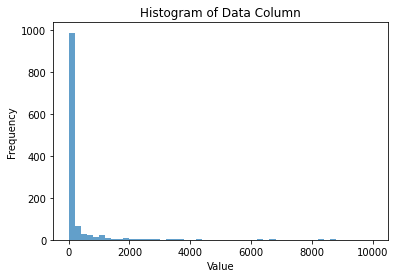

In [78]:
import matplotlib.pyplot as plt

data['value'] = data['value'].astype(float)


import numpy as np
data['value'].plot(kind='hist', bins=50, alpha=0.7)
plt.title('Histogram of Data Column')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [79]:
pd.DataFrame(data['value'].describe())

,value
count,1210.000000
mean,298.345145
std,1040.351317
min,0.001000
25%,1.377250
50%,13.900000
75%,97.225000
max,9999.000000


In [ ]:
structures = data['molecule_chembl_id']

In [68]:
data2 = pd.read_csv('data/inhouse.csv')
data2 = data2[['comp_id', 'smiles']]
data2

,comp_id,smiles
0,TM1,O=C(C1=CC=C(C(NCCCNC2CCCCC2)=O)C=C1)NCCCNC3CCCCC3
1,TM2,O=C(C1=CC=C(CNCCCNC2CCCCC2)C=C1)NCCCNC3CCCCC3
2,TM3,C1(NCCCNCC2=CC=C(CNCCCNC3CCCCC3)C=C2)CCCCC1
3,TM4,C1(CCCCC1)NCC2=CC=C(C=C2)CNC3CCCCC3
4,TM5,C1(CNCC2=CC=CC=N2)=CC=C(C=C1)CNCC3=CC=CC=N3
...,...,...
74,TM75,NC(NCCC[C@H](NCC1=CC=CC=N1)C(NCC2=CC=C(CN3C[C@...
75,TM76,NC(NCCC[C@H](NCC1=CC=CC=N1)C(NCC2=CC=CC=C2)=O)=N
76,TM77,O=C(NCC1=CC=C(CN(CCCNC2CCCCC2)C)C=C1)[C@@H](NC...
77,TM78,C[C@H](NCC1=CC=CC=N1)C(NCC2=CC=C(CNCCCNC3CCCCC...


In [122]:
import numpy as np

def convert_to_ic50_or_ec50(p_value):
    """
    Convert pIC50 or pEC50 to IC50 or EC50 in nM.
    
    Parameters:
    p_value (float): The pIC50 or pEC50 value to convert.

    Returns:
    float: The converted IC50 or EC50 in nM.
    """
    return 10**(-p_value) * 1e9

# Example usage:
pIC50_value = 10.5  # Example pIC50 value
pEC50_value = 3.0  # Example pEC50 value

IC50 = convert_to_ic50_or_ec50(pIC50_value)
EC50 = convert_to_ic50_or_ec50(pEC50_value)

print(f"IC50: {IC50} nM")
print(f"EC50: {EC50} nM")


IC50: 0.03162277660168379 nM
EC50: 1000000.0 nM


In [28]:


"""
    This script is for collecting compound information from the CHEMBL database
    and merge the active coumpound from the database with our inhouse compounds database.
    
    The script will output two csv files, one for positive dataset and one for negative dataset.
    The positive dataset contains the active compounds from the CHEMBL database and our inhouse database.
    The negative dataset contains the inactive compounds from the CHEMBL database.
    
    Both datasets contains the following columns:
        - comp_id: compound ID
        - smiles: SMILES string
        - bioactivity: bioactivity value
        - y_label: label for the bioactivity value, positive or negative
"""

from chembl_webresource_client.new_client import new_client
import pandas as pd



def filter_activities( standard_types, max_standard_value):
    try:
        # Filter activities based on the specified criteria
        activities = new_client.activity.filter(
            target_chembl_id='CHEMBL2107',
            standard_type__in=standard_types,
            standard_relation__in=['=', '<'],
            standard_value__lt=max_standard_value,
            standard_units__in=['uM', 'nM']
        ).only(
            "molecule_chembl_id",
            "standard_type",
            "standard_relation",
            "standard_units",
            "standard_value",
            )
        # 1. convert uM to nM
        # 2. convert pIC50 and pEC50 to normal (add unit)
        print(activities[0])

        for i, entry in enumerate(activities):
            if entry['units'] == 'uM':
                entry['value'] = float(entry['value'])*1000
                entry['units'] = 'nM'
            if entry['type'] == 'pIC50' or entry['type'] == 'pEC50':
                entry['value'] = 10**(-float(entry['value'])) * 1e9
                entry['units'] = 'nM'
                entry['type'] = entry['type'][1:]
        return activities

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return []

 
############################################################################################################
# Define the target ChEMBL ID, standard types, and maximum standard value
# target_id = "CHEMBL2107"  #CXCR4 Homo sapiens
standard_types = ["EC50", "IC50", "Ki"]

df = pd.DataFrame(filter_activities(standard_types, 10000))
df = df[['molecule_chembl_id', 'standard_relation','standard_type','standard_units','standard_value']]
df['standard_value'] = df['standard_value'].astype(float)

for column in df.columns:
    print(f"Unique values and counts in column: {column}")
    print(df[column].value_counts(dropna=False))
    print("\n")

df = df[df['standard_value']<=10000]
print(df.shape)

molecules = new_client.molecule.filter(molecule_chembl_id__in=list(df['molecule_chembl_id']))
chembl_id_to_smiles = {molecule['molecule_chembl_id']: molecule['molecule_structures']['canonical_smiles']
                       for molecule in molecules
                       if 'molecule_structures' in molecule and molecule['molecule_structures']}
smiles_df = pd.DataFrame(list(chembl_id_to_smiles.items()), columns=['molecule_chembl_id', 'smiles'])
df = df.merge(smiles_df, on='molecule_chembl_id')

print(df)
# ------ deal with repeat molecules entry in the dataset ------
# action: take the median value for the repeat molecules
cnter = df['molecule_chembl_id'].value_counts(dropna=False)
cnter = {key: value for key, value in cnter.items() if value > 1}

duplicated_molecules = df.duplicated('molecule_chembl_id', keep=False)
df_duplicates = df[duplicated_molecules]
df_duplicates


# #####################################################################
# # load inhouse dataset
# df2 = pd.read_csv('../data/inhouse.csv')
# # df2 = df2[['comp_id', 'smiles', 'bioactivity']]
,
# ########## merge two dataset############
# result = pd.concat([df2[['comp_id', 'smiles']], df[['molecule_chembl_id','smiles']]], ignore_index=True)

# print(result.head())
# print(result.shape)

# result.to_csv('./data/smiles_active_compound.csv', index=False)



df_duplicates

{'molecule_chembl_id': 'CHEMBL1202230', 'relation': '=', 'standard_relation': '=', 'standard_type': 'IC50', 'standard_units': 'nM', 'standard_value': '4363.0', 'type': 'IC50', 'units': 'uM', 'value': '4.363'}
Unique values and counts in column: molecule_chembl_id
CHEMBL18442      71
CHEMBL477121     36
CHEMBL3091687    19
CHEMBL2062277    16
CHEMBL460491     15
                 ..
CHEMBL4176060     1
CHEMBL1644074     1
CHEMBL3958178     1
CHEMBL3897384     1
CHEMBL3627790     1
Name: molecule_chembl_id, Length: 844, dtype: int64


Unique values and counts in column: standard_relation
=    1158
<       6
Name: standard_relation, dtype: int64


Unique values and counts in column: standard_type
IC50    977
EC50     96
Ki       91
Name: standard_type, dtype: int64


Unique values and counts in column: standard_units
nM    1164
Name: standard_units, dtype: int64


Unique values and counts in column: standard_value
4.0      13
10.0     12
18.0     12
11.0     11
30.0     10
         ..
292.

,molecule_chembl_id,standard_relation,standard_type,standard_units,standard_value,smiles
5,CHEMBL409991,=,IC50,nM,6900.0,C[C@H]1/C=C\[C@@H](CCCCN)NC(=O)[C@H](CCCCN)NC(...
6,CHEMBL409991,=,IC50,nM,7300.0,C[C@H]1/C=C\[C@@H](CCCCN)NC(=O)[C@H](CCCCN)NC(...
33,CHEMBL2372994,=,EC50,nM,4.0,NCCCC[C@H]1NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H]...
34,CHEMBL2372994,=,IC50,nM,22.8,NCCCC[C@H]1NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H]...
36,CHEMBL2372985,=,EC50,nM,0.4,NCCCC[C@H]1NC(=O)[C@H](CCCNC(N)=O)NC(=O)[C@@H]...
...,...,...,...,...,...,...
1137,CHEMBL4783831,=,IC50,nM,220.0,Cc1nc(CN2CCC[C@H]2c2ccccn2)cc(N2CCN(C)CC2)n1
1138,CHEMBL4783831,=,IC50,nM,2.7,Cc1nc(CN2CCC[C@H]2c2ccccn2)cc(N2CCN(C)CC2)n1
1161,CHEMBL5172755,=,IC50,nM,1.6,N=C(N)NCCC[C@H](NCc1ccccn1)C(=O)NCc1ccc(CNCCCN...
1162,CHEMBL5172755,=,IC50,nM,12.0,N=C(N)NCCC[C@H](NCc1ccccn1)C(=O)NCc1ccc(CNCCCN...


0.11.2


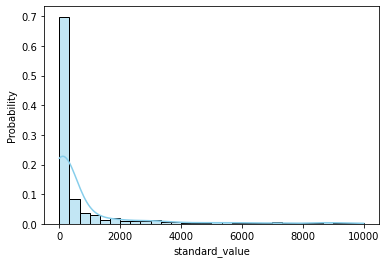

In [3]:
import seaborn as sns
sns.histplot(data=df, x='standard_value', bins=30, kde=True, color='skyblue', stat='probability')

print(sns.__version__)


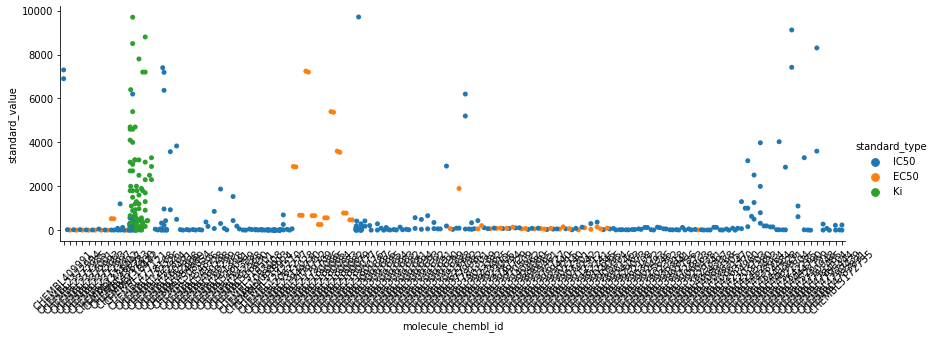

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# fig, ax = plt.subplots(figsize=(10, 6))

g = sns.catplot(data=df_duplicates, x="molecule_chembl_id", y="standard_value", 
            hue="standard_type", kind="swarm", aspect=3, height=4)
plt.xticks(rotation=45)
# plt.tight_layout()

g.fig.show()

In [23]:
def range_func(series):
    return series.max() - series.min()

# Group by 'group_column' and aggregate 'value_column' using the custom range function
range_df = df_duplicates.groupby('molecule_chembl_id')['standard_value'].agg(range_func).reset_index(name='range')

range_df

,molecule_chembl_id,range
0,CHEMBL1088913,25.00
1,CHEMBL1093008,22.00
2,CHEMBL122226,1000.00
3,CHEMBL1242210,26.30
4,CHEMBL18442,9699.19
...,...,...
120,CHEMBL5172755,234.80
121,CHEMBL518041,1569.00
122,CHEMBL518501,6.70
123,CHEMBL518924,25.00


In [29]:
# Display the result
small_range_df = range_df[range_df['range']<5000]
large_range_df = range_df[range_df['range']>=5000]
print(f"{len(small_range_df)} has small value range.")
print(f"{len(large_range_df)} has large value range.")

filtered_small_df = df_duplicates[df_duplicates['molecule_chembl_id'].isin(small_range_df['molecule_chembl_id'])]
filtered_large_df = df_duplicates[df_duplicates['molecule_chembl_id'].isin(large_range_df['molecule_chembl_id'])]
filtered_large_df


119 has small value range.
6 has large value range.


,molecule_chembl_id,standard_relation,standard_type,standard_units,standard_value,smiles
119,CHEMBL18442,=,Ki,nM,890.00,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1
120,CHEMBL18442,=,Ki,nM,2000.00,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1
121,CHEMBL18442,=,Ki,nM,4700.00,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1
122,CHEMBL18442,=,Ki,nM,3200.00,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1
123,CHEMBL18442,=,Ki,nM,4100.00,c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1
...,...,...,...,...,...,...
515,CHEMBL3091687,=,IC50,nM,91.00,NCCCCN(C[C@H]1Cc2ccccc2CN1)[C@H]1CCCc2cccnc21
516,CHEMBL3091687,=,IC50,nM,6.25,NCCCCN(C[C@H]1Cc2ccccc2CN1)[C@H]1CCCc2cccnc21
575,CHEMBL3901189,=,IC50,nM,5200.00,C[C@H](NC(=O)[C@@H](N)CCCNC(=N)N)C(=O)N[C@H]1C...
576,CHEMBL3901189,=,IC50,nM,6200.00,C[C@H](NC(=O)[C@@H](N)CCCNC(=N)N)C(=O)N[C@H]1C...


comp one


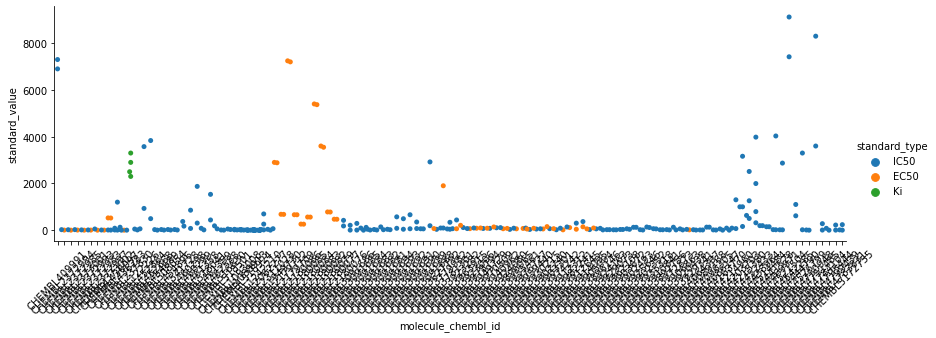

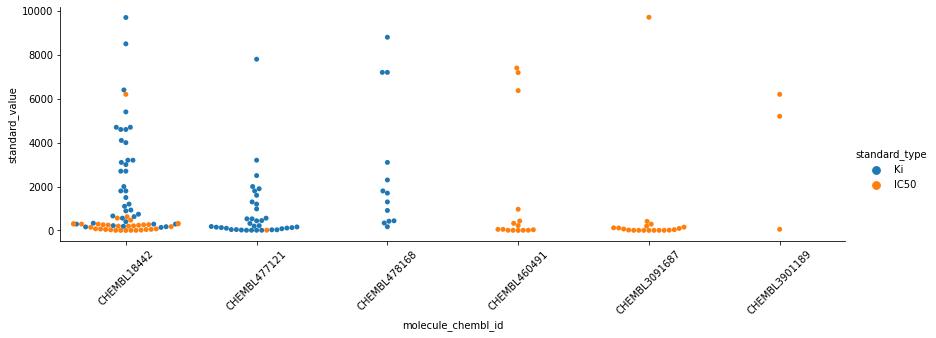

In [30]:
g1 = sns.catplot(data=filtered_small_df, x="molecule_chembl_id", y="standard_value", 
            hue="standard_type", kind="swarm", aspect=3, height=4)
plt.xticks(rotation=45)
# plt.tight_layout()
print('comp one')
g2 = sns.catplot(data=filtered_large_df, x="molecule_chembl_id", y="standard_value", 
            hue="standard_type", kind="swarm", aspect=3, height=4)
plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()

In [31]:
#find the median （无删减处理, 直接用df
df_agg = df.groupby('molecule_chembl_id')['standard_value'].median().reset_index(name='median_value')
df_agg

,molecule_chembl_id,median_value
0,CHEMBL1088867,1402.0
1,CHEMBL1088912,68.0
2,CHEMBL1088913,17.5
3,CHEMBL1088916,75.0
4,CHEMBL1089434,250.0
...,...,...
839,CHEMBL541728,17.3
840,CHEMBL543895,67.0
841,CHEMBL577268,47.0
842,CHEMBL578702,2160.0


-------

# descriptor

In [ ]:
df = pd.read_csv('./basic_ml_model/data/')